In [37]:
import json
import os

import regex
import pandas as pd
import pymc as pm

In [38]:
base_path = 'data/irr_sent_results/MGSM/'
base_path = '/Users/tuyilei/Desktop/multilingual_examplar/hypothesis_test/irr_sent_results/MGSM'
models = [
    'llama3-8b-instruct',
    'llama3.1-8b-instruct',
    'qwen2-7b-instruct',
    'qwen2.5-7b-instruct'
]
setups = [
    'icl-english_cot-english',
    'icl-english_cot-english_rand-sent-zh-flores_10-15',
    'icl-english_cot-english_rand-sent-en-flores_10-15',
    'icl-chinese_cot-english',
    'icl-chinese_cot-english_rand-sent-en-flores_10-15',
    'icl-chinese_cot-english_rand-sent-zh-flores_10-15',
]
hrls = ['fr', 'en', 'ja', 'ru', 'es', 'zh', 'de']
lrls = ['sw', 'te', 'th', 'bn']

In [39]:
full_data = []
for model in models:
    for setup in setups:
        data_paths = os.listdir(os.path.join(base_path, model, setup))
        # find language name (lowercase letters) after "cot-"
        cot_language = regex.match(r'.*cot-([a-z]+)', setup).group(1)
        icl_language = regex.match(r'icl-(.*?)(?=_)', setup).group(1)
        try:
            noise_language = regex.match(r'.*rand-sent-(\w+)', setup).group(1)
        except AttributeError:
            noise_language = 'N/A'
        for data_path in data_paths:
            if data_path.endswith('.json'):
                problem_language = regex.match(r'.*results_(\w+).json', data_path).group(1)
                with open(os.path.join(base_path, model, setup, data_path), 'r') as f:
                    data = json.load(f)
                    for item in data:
                        item['icl_language'] = icl_language
                        item['cot_language'] = cot_language
                        item['noise_language'] = noise_language
                        item['problem_language'] = problem_language
                        item['model'] = model
                        item['setup'] = setup
                    full_data.extend(data)

df = pd.DataFrame(full_data)

In [40]:
# for model in models:
#     subdf = df[df['model'] == model]
#     df_encot_enex_nonoise = subdf[(subdf['cot_language'] == 'english') & (subdf['noise_language'] == 'N/A')]
#     df_encot_enex_zhnoise = subdf[(subdf['cot_language'] == 'english') & (subdf['noise_language'] == 'zh')]
#     df_encot_enex_ennoise = subdf[(subdf['cot_language'] == 'english') & (subdf['noise_language'] == 'en')]
#     df_encot_enex_nonise_lrl = df_encot_enex_nonoise[df_encot_enex_nonoise['problem_language'].isin(lrls)]
#     df_encot_enex_zhnoise_lrl = df_encot_enex_zhnoise[df_encot_enex_zhnoise['problem_language'].isin(lrls)]
#     df_encot_enex_ennoise_lrl = df_encot_enex_ennoise[df_encot_enex_ennoise['problem_language'].isin(lrls)]
#     # Bayesian test between zh-noise and en-noise
#     with pm.Model() as model:
#         p_zhnoise = pm.Beta('p_zhnoise', 1, 1)
#         p_ennoise = pm.Beta('p_ennoise', 1, 1)
# 
#         obs_zhnoise = pm.Binomial('obs_zhnoise', n=len(df_encot_enex_zhnoise_lrl), p=p_zhnoise, observed=df_encot_enex_zhnoise_lrl['is_correct'].sum())
#         obs_ennoise = pm.Binomial('obs_ennoise', n=len(df_encot_enex_ennoise_lrl), p=p_ennoise, observed=df_encot_enex_ennoise_lrl['is_correct'].sum())
# 
#         delta = pm.Deterministic('delta', p_zhnoise - p_ennoise)
# 
#         trace = pm.sample(2000, tune=1000, chains=2)
# 
#         pm.plot_posterior(trace, var_names=["delta"], hdi_prob=0.95)
#     print()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_zhnoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 37 seconds.


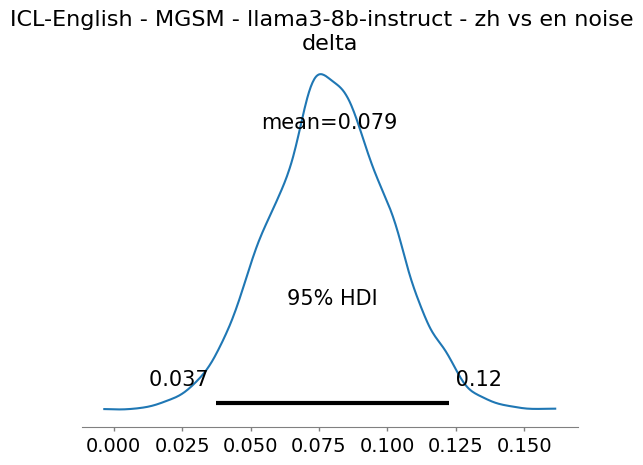

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_zhnoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


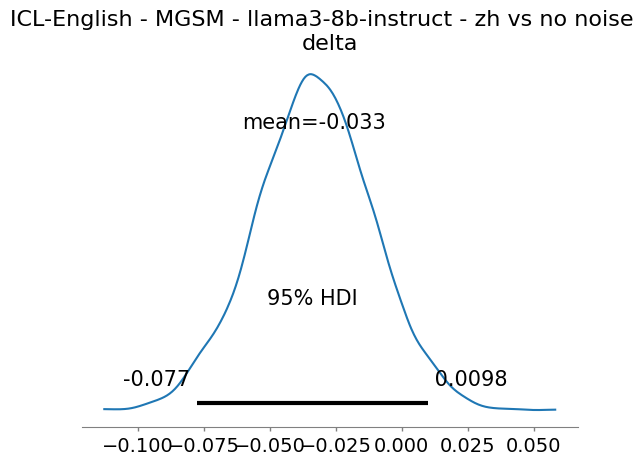

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 33 seconds.


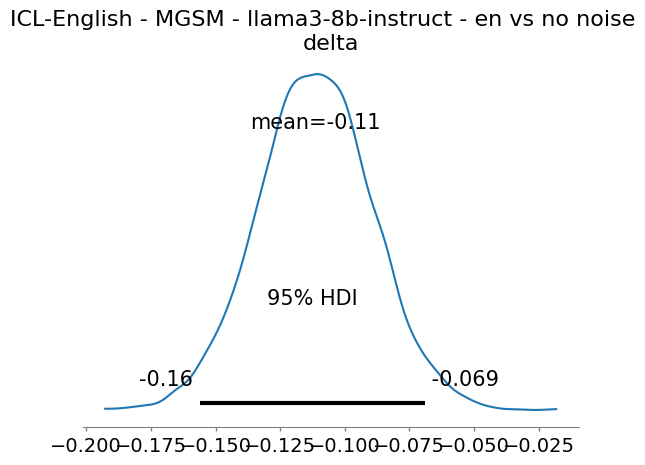

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_zhnoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


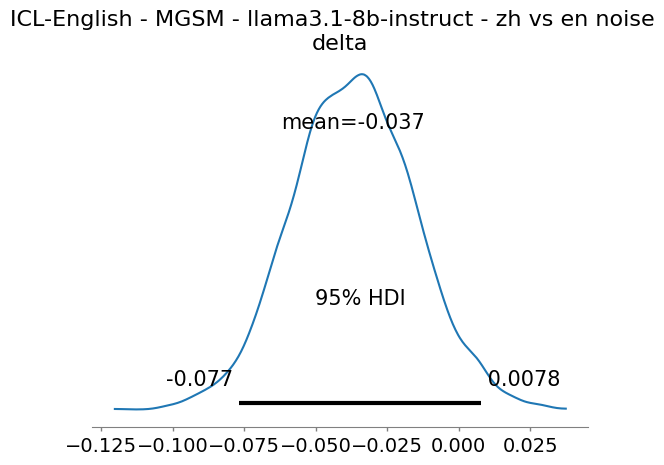

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_zhnoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 33 seconds.


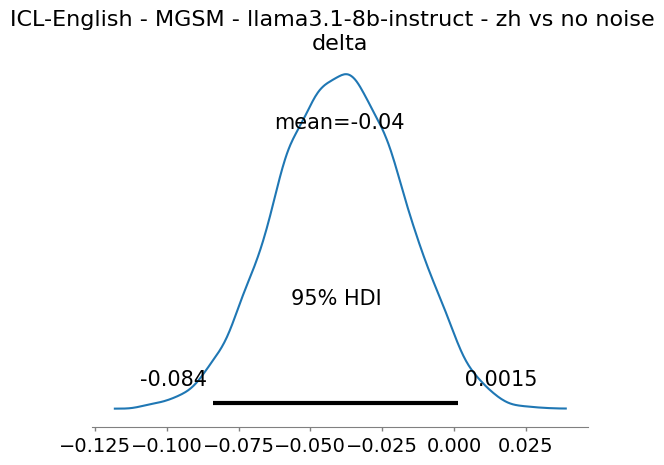

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 35 seconds.


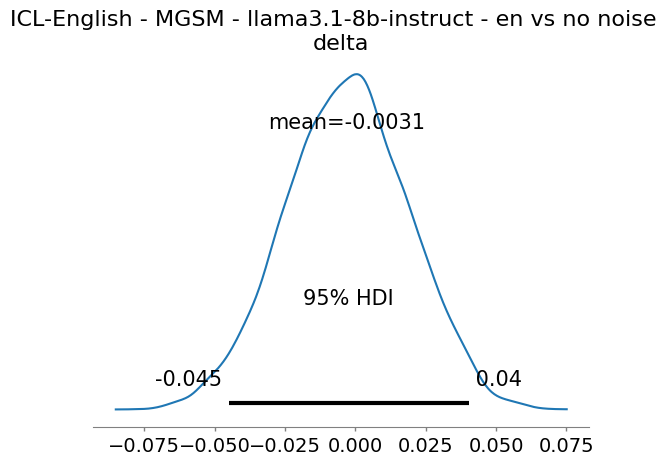

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_zhnoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 31 seconds.


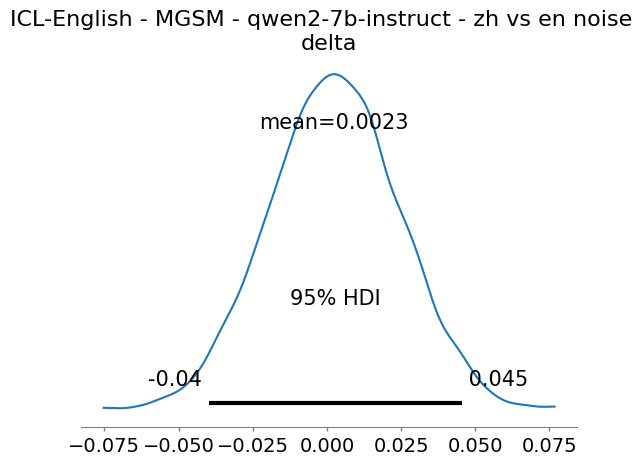

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_zhnoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


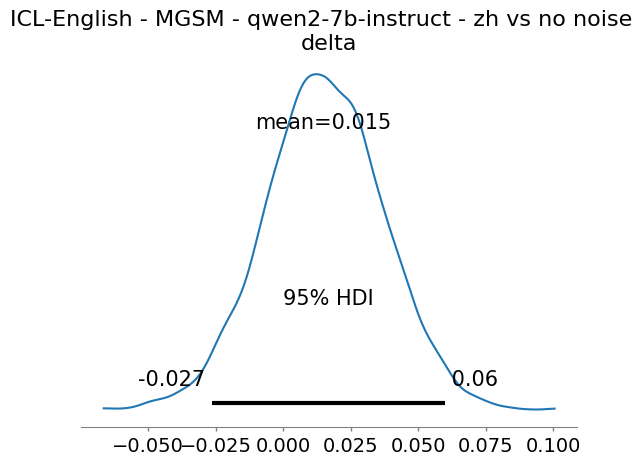

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


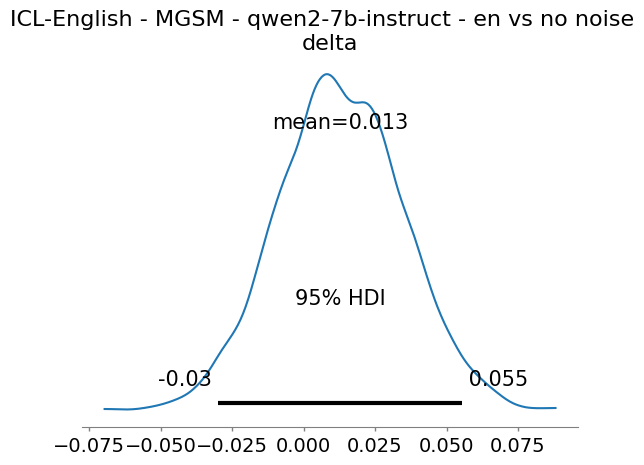

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_zhnoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.


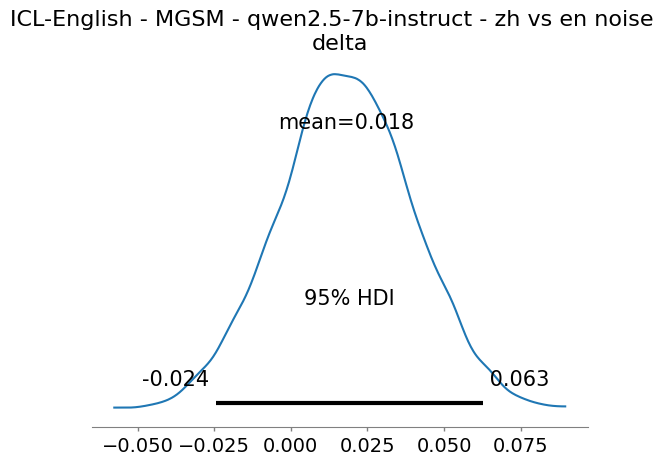

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_zhnoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


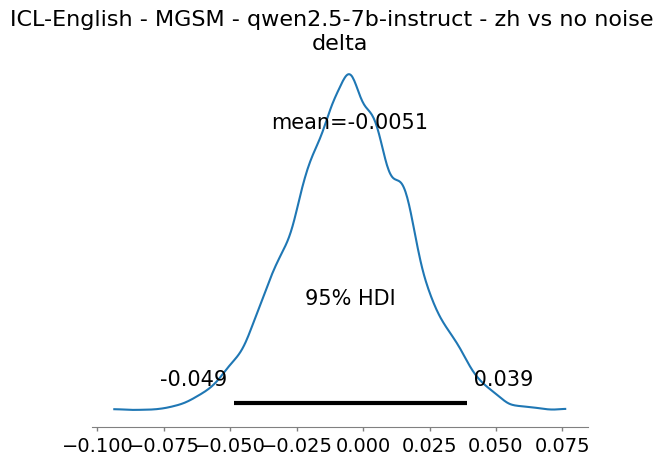

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


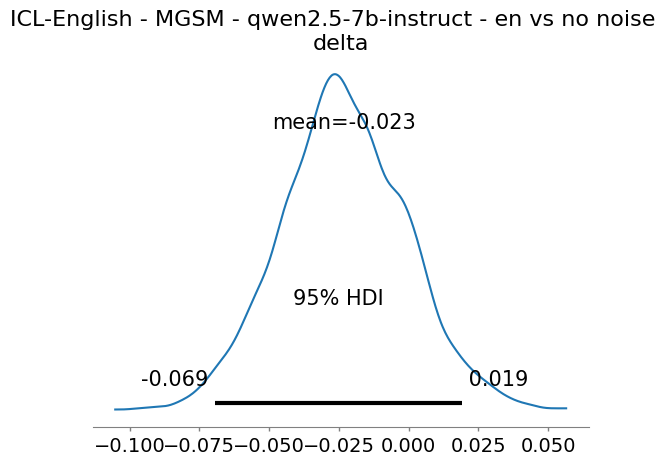

In [41]:
import matplotlib.pyplot as plt

for model in models:
    subdf = df[df['model'] == model]
    df_encot_enex_nonoise = subdf[(subdf['icl_language'] == 'english') & (subdf['noise_language'] == 'N/A')]
    df_encot_enex_zhnoise = subdf[(subdf['icl_language'] == 'english') & (subdf['noise_language'] == 'zh')]
    df_encot_enex_ennoise = subdf[(subdf['icl_language'] == 'english') & (subdf['noise_language'] == 'en')]
    df_encot_enex_nonoise_lrl = df_encot_enex_nonoise[df_encot_enex_nonoise['problem_language'].isin(lrls)]
    df_encot_enex_zhnoise_lrl = df_encot_enex_zhnoise[df_encot_enex_zhnoise['problem_language'].isin(lrls)]
    df_encot_enex_ennoise_lrl = df_encot_enex_ennoise[df_encot_enex_ennoise['problem_language'].isin(lrls)]
    # Bayesian test between zh-noise and en-noise
    with pm.Model() as zhnoise_vs_ennoise:
        p_zhnoise = pm.Beta('p_zhnoise', 1, 1)
        p_ennoise = pm.Beta('p_ennoise', 1, 1)

        obs_zhnoise = pm.Binomial('obs_zhnoise', n=len(df_encot_enex_zhnoise_lrl), p=p_zhnoise, observed=df_encot_enex_zhnoise_lrl['is_correct'].sum())
        obs_ennoise = pm.Binomial('obs_ennoise', n=len(df_encot_enex_ennoise_lrl), p=p_ennoise, observed=df_encot_enex_ennoise_lrl['is_correct'].sum())

        delta = pm.Deterministic('delta', p_zhnoise - p_ennoise)

        trace = pm.sample(2000, tune=1000, chains=4)

        ax = pm.plot_posterior(trace, var_names=["delta"], hdi_prob=0.95)
        plt.gcf().suptitle(f"ICL-English - MGSM - {model} - zh vs en noise", fontsize=16)
        plt.show()
    print()
    
    # Bayesian test between no-noise and zh-noise
    with pm.Model() as nonoise_vs_zhnoise:
        p_nonoise = pm.Beta('p_nonoise', 1, 1)
        p_zhnoise = pm.Beta('p_zhnoise', 1, 1)
    
        obs_nonoise = pm.Binomial('obs_nonoise', 
                                   n=len(df_encot_enex_nonoise_lrl), 
                                   p=p_nonoise, 
                                   observed=df_encot_enex_nonoise_lrl['is_correct'].sum())
        obs_zhnoise = pm.Binomial('obs_zhnoise', 
                                   n=len(df_encot_enex_zhnoise_lrl), 
                                   p=p_zhnoise, 
                                   observed=df_encot_enex_zhnoise_lrl['is_correct'].sum())
    
        delta = pm.Deterministic('delta', p_zhnoise - p_nonoise)
    
        trace_no_vs_en_noise = pm.sample(2000, tune=1000, chains=4)
        ax = pm.plot_posterior(trace_no_vs_en_noise, var_names=["delta"], hdi_prob=0.95)
        plt.gcf().suptitle(f"ICL-English - MGSM - {model} - zh vs no noise", fontsize=16)
        plt.show()
    print()
    
    # Bayesian test between no-noise and en-noise
    with pm.Model() as nonoise_vs_ennoise:
        p_nonoise = pm.Beta('p_nonoise', 1, 1)
        p_ennoise = pm.Beta('p_ennoise', 1, 1)
    
        obs_nonoise = pm.Binomial('obs_nonoise', 
                                   n=len(df_encot_enex_nonoise_lrl), 
                                   p=p_nonoise, 
                                   observed=df_encot_enex_nonoise_lrl['is_correct'].sum())
        obs_ennoise = pm.Binomial('obs_ennoise', 
                                   n=len(df_encot_enex_ennoise_lrl), 
                                   p=p_ennoise, 
                                   observed=df_encot_enex_ennoise_lrl['is_correct'].sum())
    
        delta = pm.Deterministic('delta', p_ennoise - p_nonoise)
    
        trace_no_vs_en_noise = pm.sample(2000, tune=1000, chains=4)
        ax = pm.plot_posterior(trace_no_vs_en_noise, var_names=["delta"], hdi_prob=0.95)
        plt.gcf().suptitle(f"ICL-English - MGSM - {model} - en vs no noise", fontsize=16)
        plt.show()

    print()


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_zhnoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


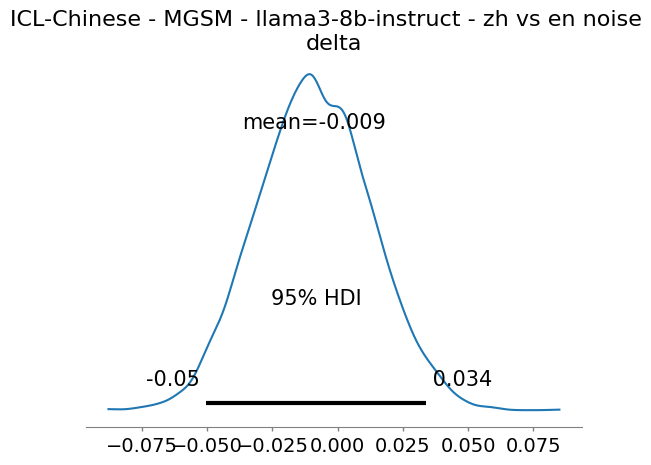

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_zhnoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


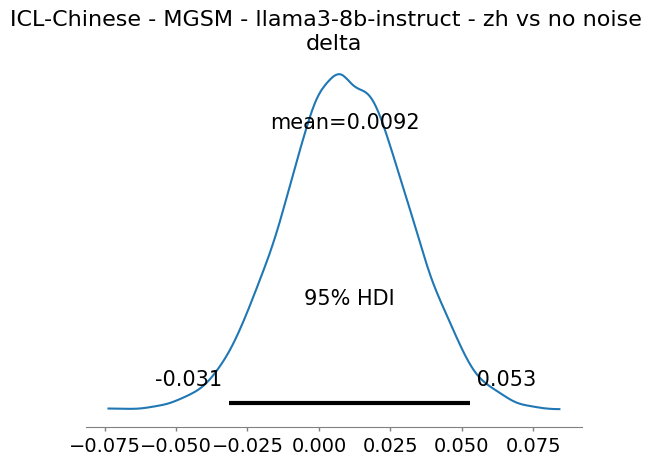

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


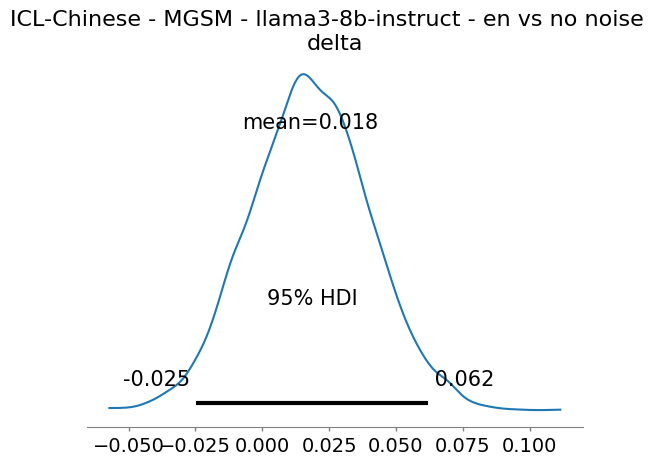

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_zhnoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


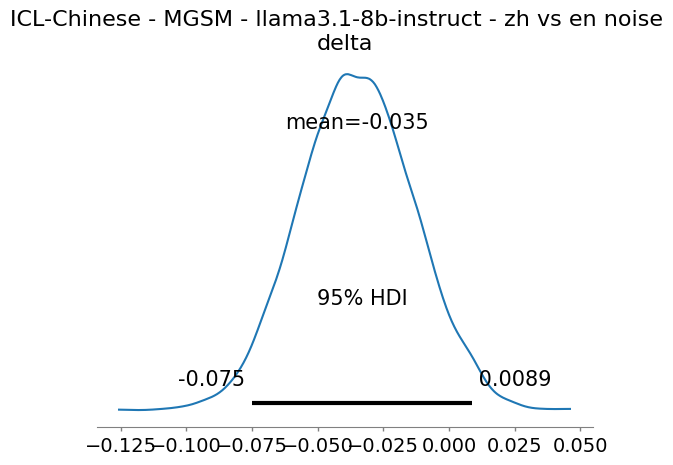

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_zhnoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


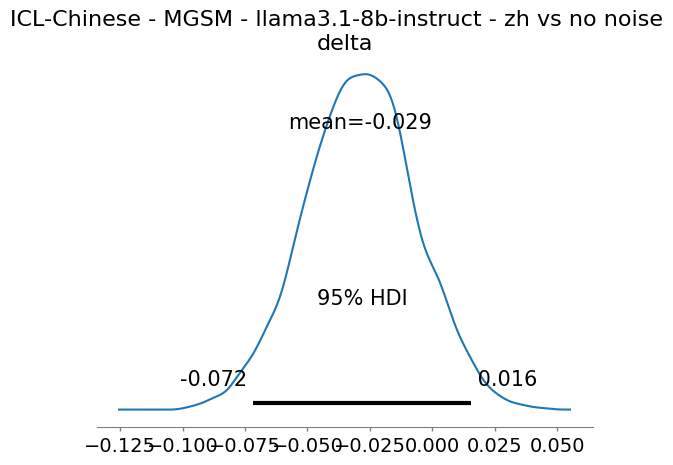

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 31 seconds.


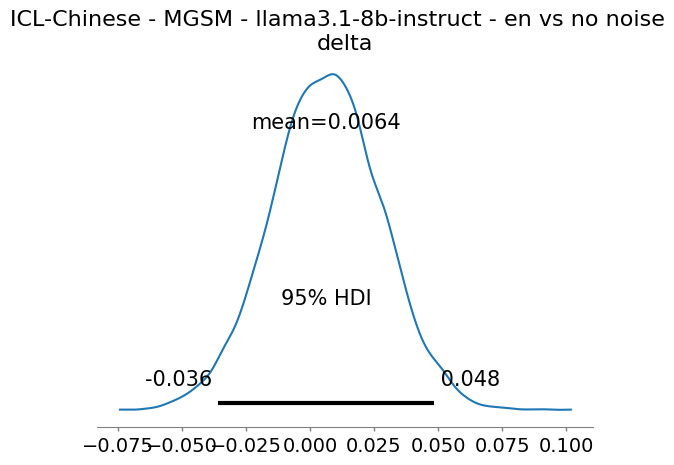

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_zhnoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 39 seconds.


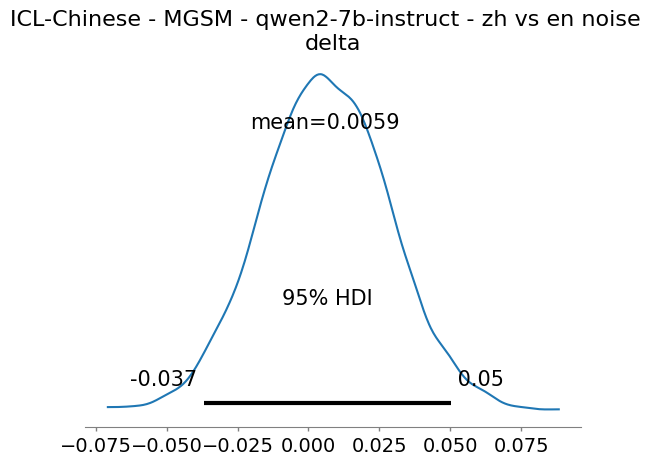

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_zhnoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 31 seconds.


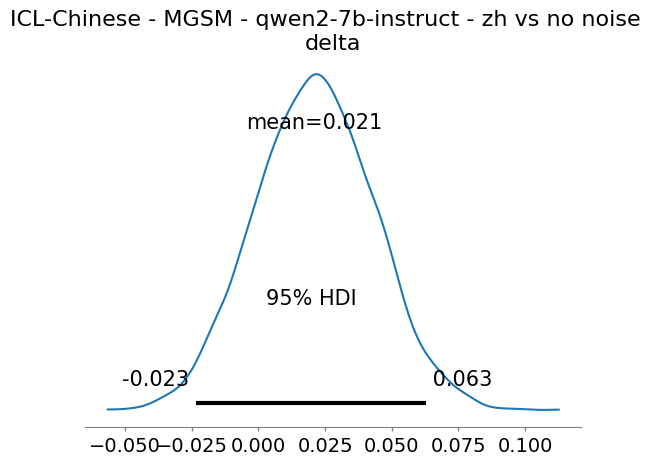

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


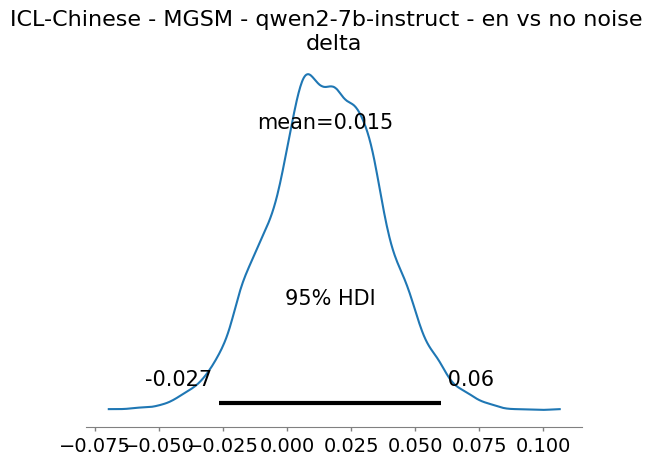

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_zhnoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


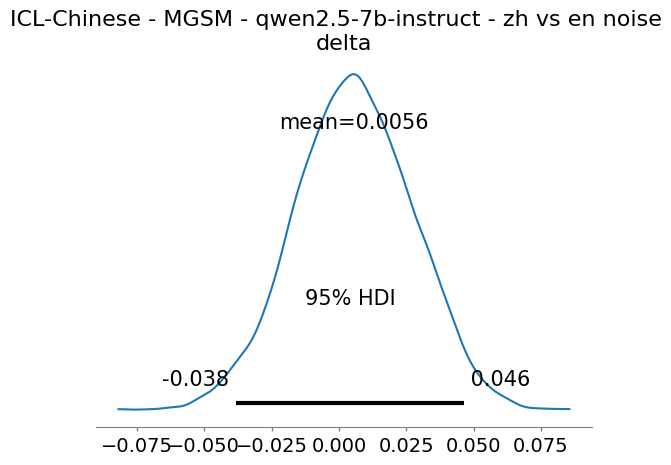

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_zhnoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.


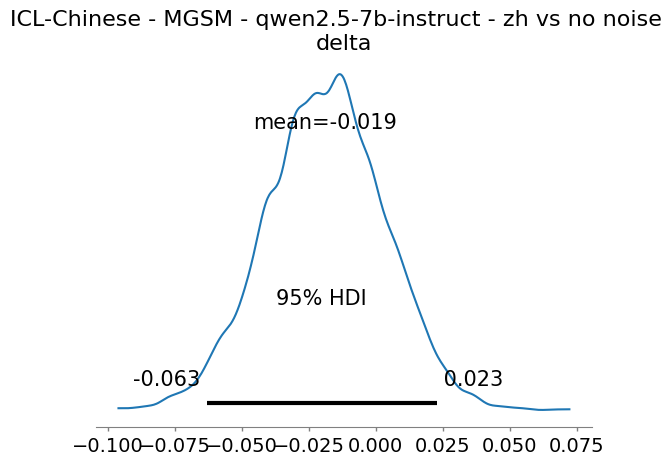

Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_nonoise, p_ennoise]


/opt/anaconda3/envs/multilingual/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


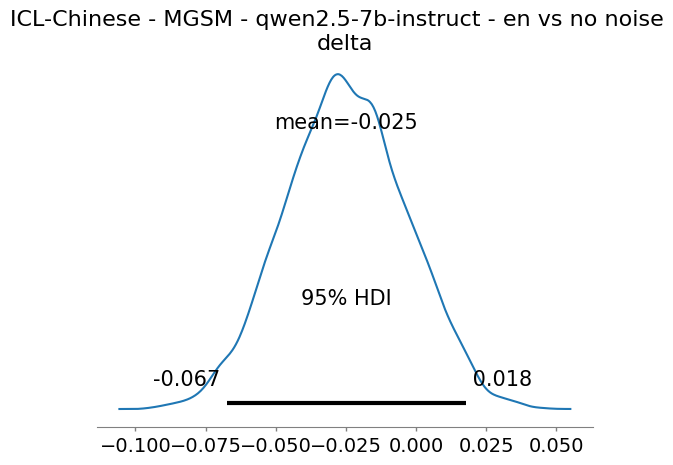

In [42]:
import matplotlib.pyplot as plt

for model in models:
    subdf = df[df['model'] == model]
    df_encot_enex_nonoise = subdf[(subdf['icl_language'] == 'chinese') & (subdf['noise_language'] == 'N/A')]
    df_encot_enex_zhnoise = subdf[(subdf['icl_language'] == 'chinese') & (subdf['noise_language'] == 'zh')]
    df_encot_enex_ennoise = subdf[(subdf['icl_language'] == 'chinese') & (subdf['noise_language'] == 'en')]
    df_encot_enex_nonoise_lrl = df_encot_enex_nonoise[df_encot_enex_nonoise['problem_language'].isin(lrls)]
    df_encot_enex_zhnoise_lrl = df_encot_enex_zhnoise[df_encot_enex_zhnoise['problem_language'].isin(lrls)]
    df_encot_enex_ennoise_lrl = df_encot_enex_ennoise[df_encot_enex_ennoise['problem_language'].isin(lrls)]
    # Bayesian test between zh-noise and en-noise
    with pm.Model() as zhnoise_vs_ennoise:
        p_zhnoise = pm.Beta('p_zhnoise', 1, 1)
        p_ennoise = pm.Beta('p_ennoise', 1, 1)

        obs_zhnoise = pm.Binomial('obs_zhnoise', n=len(df_encot_enex_zhnoise_lrl), p=p_zhnoise, observed=df_encot_enex_zhnoise_lrl['is_correct'].sum())
        obs_ennoise = pm.Binomial('obs_ennoise', n=len(df_encot_enex_ennoise_lrl), p=p_ennoise, observed=df_encot_enex_ennoise_lrl['is_correct'].sum())

        delta = pm.Deterministic('delta', p_zhnoise - p_ennoise)

        trace = pm.sample(2000, tune=1000, chains=4)

        ax = pm.plot_posterior(trace, var_names=["delta"], hdi_prob=0.95)
        plt.gcf().suptitle(f"ICL-Chinese - MGSM - {model} - zh vs en noise", fontsize=16)
        plt.show()
    print()
    
    # Bayesian test between no-noise and zh-noise
    with pm.Model() as nonoise_vs_zhnoise:
        p_nonoise = pm.Beta('p_nonoise', 1, 1)
        p_zhnoise = pm.Beta('p_zhnoise', 1, 1)
    
        obs_nonoise = pm.Binomial('obs_nonoise', 
                                   n=len(df_encot_enex_nonoise_lrl), 
                                   p=p_nonoise, 
                                   observed=df_encot_enex_nonoise_lrl['is_correct'].sum())
        obs_zhnoise = pm.Binomial('obs_zhnoise', 
                                   n=len(df_encot_enex_zhnoise_lrl), 
                                   p=p_zhnoise, 
                                   observed=df_encot_enex_zhnoise_lrl['is_correct'].sum())
    
        delta = pm.Deterministic('delta', p_zhnoise - p_nonoise)
    
        trace_no_vs_en_noise = pm.sample(2000, tune=1000, chains=4)
        ax = pm.plot_posterior(trace_no_vs_en_noise, var_names=["delta"], hdi_prob=0.95)
        plt.gcf().suptitle(f"ICL-Chinese - MGSM - {model} - zh vs no noise", fontsize=16)
        plt.show()
    print()
    
    # Bayesian test between no-noise and en-noise
    with pm.Model() as nonoise_vs_ennoise:
        p_nonoise = pm.Beta('p_nonoise', 1, 1)
        p_ennoise = pm.Beta('p_ennoise', 1, 1)
    
        obs_nonoise = pm.Binomial('obs_nonoise', 
                                   n=len(df_encot_enex_nonoise_lrl), 
                                   p=p_nonoise, 
                                   observed=df_encot_enex_nonoise_lrl['is_correct'].sum())
        obs_ennoise = pm.Binomial('obs_ennoise', 
                                   n=len(df_encot_enex_ennoise_lrl), 
                                   p=p_ennoise, 
                                   observed=df_encot_enex_ennoise_lrl['is_correct'].sum())
    
        delta = pm.Deterministic('delta', p_ennoise - p_nonoise)
    
        trace_no_vs_en_noise = pm.sample(2000, tune=1000, chains=4)
        ax = pm.plot_posterior(trace_no_vs_en_noise, var_names=["delta"], hdi_prob=0.95)
        plt.gcf().suptitle(f"ICL-Chinese - MGSM - {model} - en vs no noise", fontsize=16)
        plt.show()

    print()